In [ ]:
### RQ1_All ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.io import loadmat
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

# 替换为你的 .mat 文件路径
mat_data = loadmat('RQ1_Budget_1000.mat')

# 可以使用 `print(mat_data.keys())` 查看所有变量名
pts = np.array(mat_data['allCounts']).flatten()  # 将其转为一维数组


# RGB 格式定义颜色（归一化到 0-1）
green = [34 / 255, 139 / 255, 34 / 255]
orange = [244 / 255, 119 / 255, 58 / 255]
blue = [0 / 255, 122 / 255, 204 / 255]
red = [244 / 255, 67 / 255, 54 / 255]
purple = [128 / 255, 74 / 255, 196 / 255]

# 创建颜色数组：根据条件分配颜色
colors = []
for i, val in enumerate(pts):
    if i < 1:
        colors.append(green)
    elif i >= 1 and i < 9:
        colors.append(orange)
    elif i >= 9 and i < 15:
        colors.append(blue)
    elif i >= 15 and i < 51:
        colors.append(red)
    else:
        colors.append(purple)

# # 设置子图的 y 轴范围
# All Budget = 200
# y_ranges = [(230, 240), (60, 70), (0, 20)]
# All Budget = 1000
y_ranges = [(280, 290), (140, 150), (0, 20)]
heights = [y_max - y_min for y_min, y_max in y_ranges]  # 计算每段范围的高度

# 使用 gridspec 创建具有动态高度的子图
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(len(y_ranges), 1, height_ratios=heights)  # 设置每段高度比例

# 创建子图
axes = [fig.add_subplot(gs[i]) for i in range(len(y_ranges))]

# 绘制每个子图的柱状图
x = np.arange(1, len(pts)+1)
for ax, (y_min, y_max) in zip(axes, y_ranges):
    ax.bar(x, pts, color=colors)
    ax.set_ylim(y_min, y_max)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # 确保刻度为整数
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  # 删除两端的刻度
    ax.yaxis.set_major_locator(MultipleLocator(5))

for ax in axes:
    ax.tick_params(axis='x', labelsize=16)  # 调整 x 轴刻度字体大小
    ax.tick_params(axis='y', labelsize=16)  # 调整 y 轴刻度字体大小

# 添加图例
legend_labels = ['RT1', 'RT2', 'RT3', 'RT4', 'RT5']
handles = [
    plt.Rectangle((0, 0), 1, 1, color=green),
    plt.Rectangle((0, 0), 1, 1, color=orange),
    plt.Rectangle((0, 0), 1, 1, color=blue),
    plt.Rectangle((0, 0), 1, 1, color=red),
    plt.Rectangle((0, 0), 1, 1, color=purple)
]
axes[0].legend(handles, legend_labels, loc='upper right', fontsize=13, frameon=False)

# 设置 X 轴的刻度
ticks = np.arange(5, 80, 5)  # 刻度位置从 5 开始，每隔 5 个
ticks = np.insert(ticks, 5, 1)  # 在刻度的最前面插入 1

# 设置 X 轴的刻度（仅显示在最后一个子图上）
axes[-1].set_xticks(ticks)  # 设置刻度位置
axes[-1].set_xticklabels(ticks)  # 设置刻度标签
axes[-1].set_xlabel('Rank Number', fontsize=16)

# 移除上部子图的 X 轴刻度和轴线，同时隐藏顶部边框
for ax in axes[:-1]:
    ax.set_xticks([])         # 清除 X 轴刻度
    ax.set_xticklabels([])    # 清除 X 轴刻度标签
    ax.spines['bottom'].set_visible(False)  # 隐藏底部边框线
    # ax.spines['top'].set_visible(False)     # 隐藏顶部边框线
axes[1].spines['top'].set_visible(False)     # 隐藏顶部边框线

# 添加断轴的对角线
d = .015  # 断轴线的长度
for i in range(len(axes) - 1):
    kwargs = dict(transform=axes[i].transAxes, color='k', clip_on=False)
    axes[i].plot((-d, +d), (-d, +d), **kwargs)        # 左上方对角线
    axes[i].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 右上方对角线

    kwargs.update(transform=axes[i + 1].transAxes)  # 切换到下一个子图坐标系
    axes[i + 1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 左下方对角线
    axes[i + 1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 右下方对角线

# 移除顶部和底部的边框线
axes[0].spines['bottom'].set_visible(False)
axes[-1].spines['top'].set_visible(False)

# 添加 Y 轴的标签
fig.text(0.04, 0.55, 'Number of Benchmarks', ha='center', va='center', rotation='vertical', fontsize=16)

# 自动调整布局
plt.tight_layout(rect=[0.04, 0.03, 1, 0.97])  # 左边留更多空间
# 保存图形为 PDF 文件
plt.savefig('RQ1_All_Budget_1000.pdf', format='pdf')
plt.show()

In [ ]:
### RQ1_spec ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy.io import loadmat

# 替换为你的 .mat 文件路径
mat_data = loadmat('RQ1_Budget_1000.mat')
# s1Counts, s3Counts, s5Counts, cc3Counts, cc5Counts
pts = np.array(mat_data['archCounts']).flatten()  # 将其转为一维数组


# RGB 格式定义颜色（归一化到 0-1）
green = [34 / 255, 139 / 255, 34 / 255]
orange = [244 / 255, 119 / 255, 58 / 255]
blue = [0 / 255, 122 / 255, 204 / 255]
red = [244 / 255, 67 / 255, 54 / 255]
purple = [128 / 255, 74 / 255, 196 / 255]

# 创建颜色数组：根据条件分配颜色
colors = []
for i, val in enumerate(pts):
    if i < 1:
        colors.append(green)
    elif i >= 1 and i < 9:
        colors.append(orange)
    elif i >= 9 and i < 15:
        colors.append(blue)
    elif i >= 15 and i < 51:
        colors.append(red)
    else:
        colors.append(purple)

# 设置子图的 y 轴范围
# Budget = 200
# y_ranges = [(45,50), (0, 15)] # S1
# y_ranges = [(70,80), (0, 25)] # S3
# y_ranges = [(25,30), (0, 10)] # S5
# y_ranges = [(25,30), (0, 10)] # CC3
# y_ranges = [(58,62), (25,30), (0, 5)] # CC5
# Budget = 1000
y_ranges = [(35,40), (0,15)]  # S1
# y_ranges = [(80,90), (0, 30)] # S3
# y_ranges = [(35,44), (0, 10)] # S5
# y_ranges = [(50,56), (0, 20)] # CC3
# y_ranges = [(64,68),(42,46),(0,5)] # CC5
# y_ranges = [(0,8)] # arch

heights = [y_max - y_min for y_min, y_max in y_ranges]  # 计算每段范围的高度

# 使用 gridspec 创建具有动态高度的子图
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(len(y_ranges), 1, height_ratios=heights)  # 设置每段高度比例

# 创建子图
axes = [fig.add_subplot(gs[i]) for i in range(len(y_ranges))]

# 绘制每个子图的柱状图
x = np.arange(1, len(pts)+1)
for ax, (y_min, y_max) in zip(axes, y_ranges):
    ax.bar(x, pts, color=colors)
    ax.set_ylim(y_min, y_max)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # 确保刻度为整数
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  # 删除两端的刻度
    ax.yaxis.set_major_locator(MultipleLocator(2))

for ax in axes:
    ax.tick_params(axis='x', labelsize=16)  # 调整 x 轴刻度字体大小
    ax.tick_params(axis='y', labelsize=16)  # 调整 y 轴刻度字体大小

# 添加图例
legend_labels = ['RT1', 'RT2', 'RT3', 'RT4', 'RT5']
handles = [
    plt.Rectangle((0, 0), 1, 1, color=green),
    plt.Rectangle((0, 0), 1, 1, color=orange),
    plt.Rectangle((0, 0), 1, 1, color=blue),
    plt.Rectangle((0, 0), 1, 1, color=red),
    plt.Rectangle((0, 0), 1, 1, color=purple)
]
axes[0].legend(handles, legend_labels, loc='upper right', fontsize=13, frameon=False)

# 设置 X 轴的刻度，首先把第一个刻度设置为 1，然后每隔 5 增加直到 75
ticks = np.arange(5, 80, 5)  # 刻度位置从 1 开始，每隔 5 个
ticks = np.insert(ticks, 5, 1)  # 在刻度的最前面插入 1

# 设置 X 轴的刻度位置和刻度标签
axes[-1].set_xticks(ticks)  # 设置刻度位置
axes[-1].set_xticklabels(ticks)  # 设置刻度标签
axes[-1].set_xlabel('Rank Number', fontsize=16)

# 移除上部子图的 X 轴刻度和轴线，同时隐藏顶部边框
for ax in axes[:-1]:
    ax.set_xticks([])         # 清除 X 轴刻度
    ax.set_xticklabels([])    # 清除 X 轴刻度标签
    ax.spines['bottom'].set_visible(False)  # 隐藏底部边框线
    # ax.spines['top'].set_visible(False)     # 隐藏顶部边框线
axes[1].spines['top'].set_visible(False)     # 隐藏顶部边框线

# 添加断轴的对角线
d = .015  # 断轴线的长度
for i in range(len(axes) - 1):
    kwargs = dict(transform=axes[i].transAxes, color='k', clip_on=False)
    axes[i].plot((-d, +d), (-d, +d), **kwargs)        # 左上方对角线
    axes[i].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 右上方对角线

    kwargs.update(transform=axes[i + 1].transAxes)  # 切换到下一个子图坐标系
    axes[i + 1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 左下方对角线
    axes[i + 1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 右下方对角线

# 移除顶部和底部的边框线
axes[0].spines['bottom'].set_visible(False)
axes[-1].spines['top'].set_visible(False)

# 添加 Y 轴的标签
fig.text(0.04, 0.55, 'Number of Benchmarks', ha='center', va='center', rotation='vertical', fontsize=16)

# 自动调整布局
plt.tight_layout(rect=[0.04, 0.03, 1, 0.97])  # 左边留更多空间
# 保存图形为 PDF 文件
plt.savefig('RQ1_S1_Budget_1000.pdf', format='pdf')
# plt.savefig('RQ1_S3_Budget_1000.pdf', format='pdf')
# plt.savefig('RQ1_S5_Budget_1000.pdf', format='pdf')
# plt.savefig('RQ1_CC3_Budget_1000.pdf', format='pdf')
# plt.savefig('RQ1_CC5_Budget_1000.pdf', format='pdf')
plt.show()

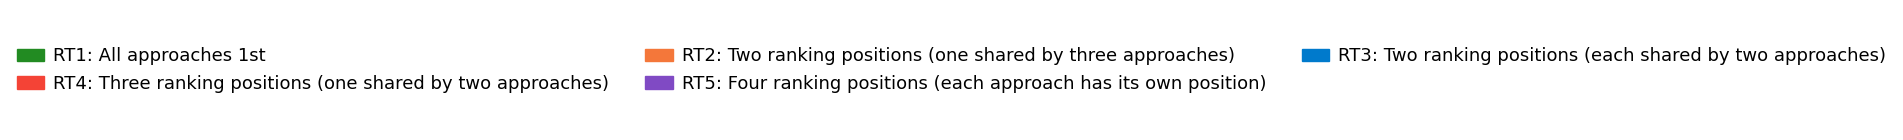

In [ ]:
### RQ1 Legend ###
import matplotlib.pyplot as plt

# Define legend labels
legend_labels = ['RT1: All approaches 1st', 'RT4: Three ranking positions (one shared by two approaches)', 'RT2: Two ranking positions (one shared by three approaches)', 'RT5: Four ranking positions (each approach has its own position)', 'RT3: Two ranking positions (each shared by two approaches)']


# RGB 格式定义颜色（归一化到 0-1）
green = [34 / 255, 139 / 255, 34 / 255]
orange = [244 / 255, 119 / 255, 58 / 255]
blue = [0 / 255, 122 / 255, 204 / 255]
red = [244 / 255, 67 / 255, 54 / 255]
purple = [128/255,74/255,196/255]


# Create legend handles using colored rectangles
handles = [
    plt.Rectangle((0, 0), 1, 1, color=green),
    plt.Rectangle((0, 0), 1, 1, color=red),
    plt.Rectangle((0, 0), 1, 1, color=orange),
    plt.Rectangle((0, 0), 1, 1, color=purple),
    plt.Rectangle((0, 0), 1, 1, color=blue),
]

# Create a figure for the legend
fig, ax = plt.subplots(figsize=(6, 2))

# Hide the axes
ax.axis('off')

# Create the legend, with 3 items on the first row and 2 items on the second row
legend = ax.legend(
    handles, legend_labels, loc='center', fontsize=13,
    ncol=3, frameon=False, handlelength=1.5, handletextpad=0.5
)

# Adjust the layout and save the legend as a PDF
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.savefig('only_legend.pdf', format='pdf', bbox_inches='tight', dpi = 300)

# Show the legend (optional)
plt.show()

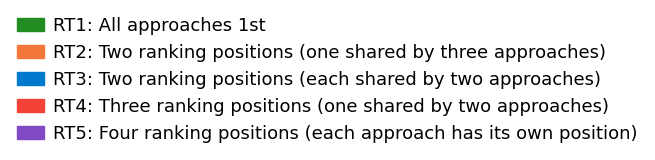

In [ ]:
import matplotlib.pyplot as plt

# Define legend labels
legend_labels = ['RT1: All approaches 1st', 'RT2: Two ranking positions (one shared by three approaches)', 'RT3: Two ranking positions (each shared by two approaches)', 'RT4: Three ranking positions (one shared by two approaches)', 'RT5: Four ranking positions (each approach has its own position)']


# RGB 格式定义颜色（归一化到 0-1）
green = [34 / 255, 139 / 255, 34 / 255]
orange = [244 / 255, 119 / 255, 58 / 255]
blue = [0 / 255, 122 / 255, 204 / 255]
red = [244 / 255, 67 / 255, 54 / 255]
purple = [128/255,74/255,196/255]


# Create legend handles using colored rectangles
handles = [
    plt.Rectangle((0, 0), 1, 1, color=green),
    plt.Rectangle((0, 0), 1, 1, color=orange),
    plt.Rectangle((0, 0), 1, 1, color=blue),
    plt.Rectangle((0, 0), 1, 1, color=red),
    plt.Rectangle((0, 0), 1, 1, color=purple),
]

# Create a figure for the legend
fig, ax = plt.subplots(figsize=(6, 2))

# Hide the axes
ax.axis('off')

# Create the legend, with 3 items on the first row and 2 items on the second row
legend = ax.legend(
    handles, legend_labels, loc='center', fontsize=13,
    ncol=1, frameon=False, handlelength=1.5, handletextpad=0.5
)

# Adjust the layout and save the legend as a PDF
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.savefig('only_legend.pdf', format='pdf', bbox_inches='tight', dpi = 300)

# Show the legend (optional)
plt.show()

In [ ]:
### RQ1 Boxplot ###
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# 从 .mat 文件加载数据
# mat_data = loadmat('RQ1_Budget_1000_Avg_SR.mat')  # 替换为你的 .mat 文件路径

# # 每个小组的数据（4 个柱子，每个柱子由 4 个数字构成）
# group_1 = np.array(mat_data['RQ1_avg_SR_All']).flatten()
# group_2 = np.array(mat_data['RQ1_avg_SR_s1']).flatten()
# group_3 = np.array(mat_data['RQ1_avg_SR_s3']).flatten()
# group_4 = np.array(mat_data['RQ1_avg_SR_s5']).flatten()
# group_5 = np.array(mat_data['RQ1_avg_SR_cc3']).flatten()
# group_6 = np.array(mat_data['RQ1_avg_SR_cc5']).flatten()

# 从 .mat 文件加载数据
mat_data = loadmat('RQ1_Budget_1000_Stdv_SR.mat')  # 替换为你的 .mat 文件路径

# 每个小组的数据（4 个柱子，每个柱子由 4 个数字构成）
group_1 = np.array(mat_data['RQ1_stdv_SR_All']).flatten()
group_2 = np.array(mat_data['RQ1_stdv_SR_s1']).flatten()
group_3 = np.array(mat_data['RQ1_stdv_SR_s3']).flatten()
group_4 = np.array(mat_data['RQ1_stdv_SR_s5']).flatten()
group_5 = np.array(mat_data['RQ1_stdv_SR_cc3']).flatten()
group_6 = np.array(mat_data['RQ1_stdv_SR_cc5']).flatten()


# 将数据放入列表
data = [group_1, group_2, group_3, group_4, group_5, group_6]

# 设置颜色
colors = ['#FF9999', '#99FF99', '#9999FF', '#FFCC99', '#FF3366', '#66CCFF']

# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图，去除 notch 并设置较大宽度以形成长方形
box = ax.boxplot(data, patch_artist=True, notch=False, showmeans=False, widths=0.5)

# 为箱线图填充颜色并设置透明度
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.3)  # 设置透明度为 0.3

# 绘制散点图
for i, (group, color) in enumerate(zip(data, colors), start=1):
    # 在 x=i 位置绘制散点，增加抖动效果
    x = np.random.normal(i, 0.04, size=len(group))  # 添加抖动
    ax.scatter(x, group, color=color, alpha=0.6, edgecolor='k', s=50)

# 设置 X 轴标签
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['All', r'$\varphi_1$', r'$\varphi_2$', r'$\varphi_3$', r'$\varphi_4$', r'$\varphi_5$'], fontsize=24)
ax.set_ylabel('Stdv-SR', fontsize=20)
# 设置 y 轴刻度标签的字体大小
ax.tick_params(axis='y', labelsize=20)

# 显示网格线
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 调整布局并显示图表
plt.tight_layout()
plt.savefig('RQ1_Stdv_Boxplot_Budget_1000_Scattered.pdf', format='pdf', dpi = 300)  # 将图表保存为 PDF
plt.show()

In [ ]:
### RQ3 ###
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# 从 .mat 文件加载数据
mat_data = loadmat('RQ3_Avg_SR_R1.mat')  # 替换为你的 .mat 文件路径

# # 每个小组的数据（4 个柱子，每个柱子由 4 个数字构成）
group_1 = np.array(mat_data['RQ3_avg_SR_diff_0']).flatten()
group_2 = np.array(mat_data['RQ3_avg_SR_diff_001']).flatten()
group_3 = np.array(mat_data['RQ3_avg_SR_diff_005']).flatten()
group_4 = np.array(mat_data['RQ3_avg_SR_diff_01']).flatten()

# # 从 .mat 文件加载数据
# mat_data = loadmat('RQ3_Stdv_SR_R1.mat')  # 替换为你的 .mat 文件路径

# # 每个小组的数据（4 个柱子，每个柱子由 4 个数字构成）
# group_1 = np.array(mat_data['RQ3_stdv_SR_diff_0']).flatten()
# group_2 = np.array(mat_data['RQ3_stdv_SR_diff_001']).flatten()
# group_3 = np.array(mat_data['RQ3_stdv_SR_diff_005']).flatten()
# group_4 = np.array(mat_data['RQ3_stdv_SR_diff_01']).flatten()


# 将数据放入列表
data = [group_1, group_2, group_3, group_4]

# 设置颜色
colors = ['#FF9999', '#99FF99', '#9999FF', '#FFCC99']

# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图，去除 notch 并设置较大宽度以形成长方形
box = ax.boxplot(data, patch_artist=True, notch=False, showmeans=False, widths=0.5)

# 为箱线图填充颜色并设置透明度
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.3)  # 设置透明度为 0.3

# 绘制散点图
for i, (group, color) in enumerate(zip(data, colors), start=1):
    # 在 x=i 位置绘制散点，增加抖动效果
    x = np.random.normal(i, 0.04, size=len(group))  # 添加抖动
    ax.scatter(x, group, color=color, alpha=0.6, edgecolor='k', s=50)

# 设置 X 轴标签
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['vr = 0', 'vr = 0.01', 'vr = 0.05', 'vr = 0.1'], fontsize=24)
ax.set_ylabel('Avg-SR', fontsize=20)
# 设置 y 轴刻度标签的字体大小
ax.tick_params(axis='y', labelsize=20)

# 显示网格线
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 调整布局并显示图表
plt.tight_layout()
plt.savefig('RQ3_Avg_Boxplot_Budget_1000_Scattered.pdf', format='pdf', dpi = 300)  # 将图表保存为 PDF
plt.show()

In [ ]:
### RQ4 ###
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# load the data for RQ4
# mat_data = loadmat('RQ2_Budget_200.mat')
# mat_data = loadmat('RQ2_Budget_400.mat')
# mat_data = loadmat('RQ2_Budget_600.mat')
# mat_data = loadmat('RQ2_Budget_800.mat')
mat_data = loadmat('RQ2_Budget_1000.mat')

# 6个小组的百分比数据，每个小组有4个柱子，每个柱子由4个数字构成
group_1 = np.array(mat_data['per_RQ2_Rank_All'])
group_2 = np.array(mat_data['per_RQ2_Rank_S1'])
group_3 = np.array(mat_data['per_RQ2_Rank_S3'])
group_4 = np.array(mat_data['per_RQ2_Rank_S5'])
group_5 = np.array(mat_data['per_RQ2_Rank_CC3'])
group_6 = np.array(mat_data['per_RQ2_Rank_CC5'])

# 6个小组用于文本显示的真实数据
label_group_1 = np.array(mat_data['RQ2_Rank_All'])
label_group_2 = np.array(mat_data['RQ2_Rank_S1'])
label_group_3 = np.array(mat_data['RQ2_Rank_S3'])
label_group_4 = np.array(mat_data['RQ2_Rank_S5'])
label_group_5 = np.array(mat_data['RQ2_Rank_CC3'])
label_group_6 = np.array(mat_data['RQ2_Rank_CC5'])

data = [group_1, group_2, group_3, group_4, group_5, group_6]
label_data = [label_group_1, label_group_2, label_group_3, label_group_4, label_group_5, label_group_6]

x_positions = [np.arange(4) + i * 5 for i in range(6)]
colors = ['#FFB6C1', '#98FB98', '#ADD8E6', '#FFD700']
text_colors = ['#333333', '#006400', '#00008B', '#8B4513']
sub_labels = ["CMA-ES", "SA", "MCTS", "Random"]

fig, ax = plt.subplots(figsize=(14, 8))

# 绘制堆叠柱状图
for idx, group_data in enumerate(data):
    bottom_heights = np.zeros(4)
    for j in range(4):
        ax.bar(x_positions[idx], group_data[:, j], bottom=bottom_heights, width=0.8, color=colors[j])
        bottom_heights += group_data[:, j]

        # 添加每个柱子上的数值标签
        for i in range(4):
            if group_data[i, j] != 0:
                ax.text(x_positions[idx][i], bottom_heights[i] - group_data[i, j] / 2,
                        f'{int(label_data[idx][i, j])}', ha='center', va='center',
                        fontsize=14, color=text_colors[j])

    # 显示每个小组的总和
    total_height = np.sum(label_data[idx])
    ax.text(np.mean(x_positions[idx]), 102, f'{int(total_height/4)}',
            ha='center', va='bottom', fontsize=16, color='black')

# 设置主要 X 轴标签（小组标签）
group_labels = ["All", r"$\varphi_1$", r"$\varphi_2$", r"$\varphi_3$", r"$\varphi_4$", r"$\varphi_5$"]
center_positions = [np.mean(positions) for positions in x_positions]
ax.set_xticks(center_positions)
ax.set_xticklabels(group_labels, fontsize=24)

# 添加子类标签
for idx, positions in enumerate(x_positions):
    for i, pos in enumerate(positions):
        ax.text(pos, 0, sub_labels[i], ha='center', va='top', fontsize=12, color='black', rotation = 45)

# 调整Y轴范围，留出更多空间
ax.set_ylim(-10, 115)
# 调整Y轴标签和范围
ax.set_ylabel('Percent (%)', fontsize=20)

# 设置Y轴刻度字体大小
ax.tick_params(axis='y', labelsize=20)

# 添加图例
ax.legend(['1st', '2nd', '3rd', '4th'], loc='upper center', fontsize= 14, bbox_to_anchor=(0.5, 1.0), ncol=4, frameon=False)

# 自动调整布局
plt.tight_layout()
plt.savefig('RQ4_StackedBar_Budget_1000.pdf', format='pdf')
plt.show()